<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;">    <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2024/2025</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Project</center></b></h2>
    <h4><i><b><center>Predicting Cervical Cancer: A Machine Learning Approach Using Risk Factor Analysis 
</center></b></i></h4></td></tr>
</table>


 <h3>Requesitos nos  modelos </h3>
 <li> Comparison of at least 3 models</li>
 <li>Cross-Validation</li>
 <li> Grid Search </li>
 <li> Results evaluation and discussion </li>


<h3>Avaliação </h3>

 <li> Quality of coding (temos de tipo comentar e explicar tudo)</li>
 <li>Creativity</li>
 <li> Comparison with the state of the Art </li>



<h3>1. Introduction</h3>

Cervical cancer is the fourth most common cancer worldwide and a significant cause of mortality, particularly in low- and middle-income countries, where 94% of all deaths occur [1]. Although medicine has evolved, implementing cytology-based and other types of screening remains challenging in these countries due to the lack of healthcare infrastructure and trained professionals [2]. 
With that in mind, machine learning can be used as a helpful system for interpreting complex datasets and support clinical decision-making due to its strong data analysis capabilities [3].

In clinical cases, the most common ways to detect this type of cancer include **the Cytology method, the biopsy, the Hinselmann test, and the Schiller test**. **The Cytology method** involves a microscopic analysis of tissue collected from the cervix to identify cell growth and its intensity. **The biopsy** is a surgical diagnostic procedure that involves collecting living tissue samples to determine if the sample is malignant or benign. **The Hinselmann test** is a visual inspection of the cervix using an iodine solution. However, the results of this test can vary depending on the examiner's expertise. **The Schiller test**, on the other hand, involves administering Lugol’s iodine for visual inspection of suspicious areas on the cervix. To reduce the high mortality rate of cervical cancer, it is crucial for women over 30 years of age to undergo regular screening tests every 3–5 years. In underdeveloped countries, however, frequent screening has been challenging due to limited medical infrastructure and expertise. Thus, we saw an opportunity for a biomedical solution that could renovate this practice and make it more accesible.


Altough the initial approach was to use machine learning characteristics' combined with the risk factors, in order to predict the presence of the cancer, upon analyzing the data and being more familiarized with the problem itself , it occured to us we could rewire the project to predict the results of the main four tests used to detect cervical cancer (Hinselmann, Schille, Citology and Biopsy). This work could be relevant for the management of clinical resources. For example, a person exhibiting certain risk factors could be called in to undergo only two of the four exams, saving both financial and material resource. 

Nevertheless, in order to fulfill the initial approach, we decided to use a model to predict 

 <h3>2. Data Preparation </h3>

The data preparation phase is a critical step in the development of any machine learning model. This phase involves transforming raw data into a clean, organized, and usable format, ensuring it is suitable for analysis and modeling. The primary goal of data preparation is to address inconsistencies, fill in missing values, and convert data into a format that aligns with the requirements of machine learning algorithms.

<h4> 2.1 Data import </h4>

In [49]:
#!pip install ucimlrepo
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
from typing import Tuple
from sklearn.model_selection import train_test_split

In [51]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
df_cervical_cancer = cervical_cancer_risk_factors.data.features 

#Getting dataset dimensions
n_rows = df_cervical_cancer.shape[0]
n_features = df_cervical_cancer.shape[1]
print('The dataset has {} samples and {} features. \n'.format(n_rows, n_features))

#Showing the first 10 rows of the dataset
print('The first 10 rows are displayed below. \n\n')
df_cervical_cancer.head(10)


The dataset has 858 samples and 36 features. 

The first 10 rows are displayed below. 




,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


<h5> 2.1.1 Data types </h5>
<p style="font-size:15px;"> The data is divided in integer values such as age and number of diagnosis, floats, like the age at which the patient had its first sexual intercourse and a binary classification (0 as false and 1 as true) to evaluate the results of the tests, presence of STD's etc. </p>

In [53]:
print(df_cervical_cancer.dtypes)

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [54]:
#Get all the columns with a binary classification 
binary_columns = df_cervical_cancer.loc[:, (df_cervical_cancer.isin([0, 1]) | df_cervical_cancer.isna()).all()]
binary_columns.describe().iloc[[0]]

,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,845.0,750.0,741.0,753.0,753.0,753.0,753.0,753.0,753.0,753.0,...,753.0,753.0,858.0,858.0,858.0,858.0,858.0,858.0,858.0,858.0


In [55]:
#Get the columns with continuos values
continuous_columns = df_cervical_cancer.drop(binary_columns.columns, axis=1)
continuous_columns.describe().iloc[[0,1,2,3,7]]


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,750.000000,741.000000,753.000000,858.000000,71.000000,71.000000
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.087413,6.140845,5.816901
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.302545,5.895024,5.755271
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000


In [56]:
df_cervical_cancer.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<p style="font-size:15px;"> As colunas  'STDs: Time since first diagnosis' e 'STDs: Time since last diagnosis' have a lot of missing values  então vamos droppar (n me apetece escrever em ingles)</p>

In [58]:
df_cervical_cancer= df_cervical_cancer.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1)
df_cervical_cancer.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [59]:
df_cervical_cancer = df_cervical_cancer.dropna()
print(df_cervical_cancer.shape[0])

668


In [60]:
zero_per_columns = (df_cervical_cancer == 0).sum()
print(zero_per_columns)

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                     14
Smokes                                572
Smokes (years)                        572
Smokes (packs/year)                   572
Hormonal Contraceptives               238
Hormonal Contraceptives (years)       238
IUD                                   593
IUD (years)                           593
STDs                                  603
STDs (number)                         603
STDs:condylomatosis                   631
STDs:cervical condylomatosis          668
STDs:vaginal condylomatosis           664
STDs:vulvo-perineal condylomatosis    632
STDs:syphilis                         653
STDs:pelvic inflammatory disease      667
STDs:genital herpes                   667
STDs:molluscum contagiosum            667
STDs:AIDS                             668
STDs:HIV                              655
STDs:Hepatitis B                  

<p style="font-size:15px;">STDs:AIDS e STDs:cervical condylomatosis  têm todos os valores = 0 pelo q vamos dropar  </p>

In [62]:
df_cervical_cancer= df_cervical_cancer.drop(['STDs:AIDS','STDs:cervical condylomatosis'], axis=1)
df_cervical_cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


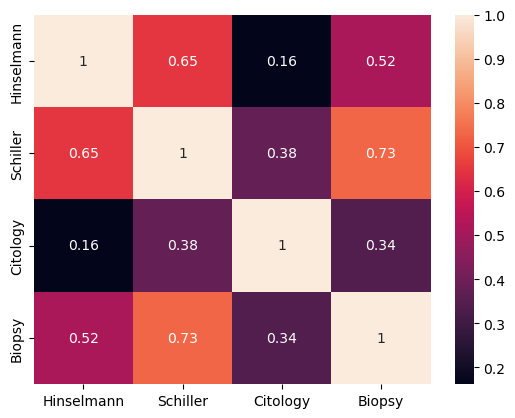

In [67]:
#Correlação entre as target variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_cervical_cancer[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].corr(), annot=True)
plt.show()

 <h3>3. Model Training </h3>

In [258]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [300]:

def train_and_evaluate_multi_target( model: Tuple[str, any], X_train: np.ndarray, Y_train: np.ndarray, X_test: np.ndarray, Y_test: np.ndarray) -> dict[str, list]:
    """
    Train and evaluate a machine learning model for multiple target variables.

    This function trains and evaluates the model for each target variable in Y_train
    and Y_test using cross-validation.

    :param model: A tuple containing the model name as a string and the model instance.
    :param X_train: Training features as a numpy array.
    :param Y_train: Training labels as a numpy array (can have multiple columns).
    :param X_test: Test features as a numpy array.
    :param Y_test: Test labels as a numpy array (can have multiple columns).
    :return: A dictionary containing performance metrics for each target variable.
    """
    model_name, model_instance = model
    metrics = {"Model Name": model_name}
    metrics_list = []

    # Iterate over each target variable (column in Y_train and Y_test)
    for i in  tqdm(range(Y_train.shape[1])):
        y_train = Y_train.iloc[:, i]  # Seleciona a coluna i do DataFrame
        y_test = Y_test.iloc[:, i]    # Seleciona a coluna i do DataFrame
        target_name = Y_train.columns[i]
        
        # Train the model
        model_instance.fit(X_train, y_train)

        # Calculate the accuracy on training and test sets
        train_acc = model_instance.score(X_train, y_train)
        test_acc = model_instance.score(X_test, y_test)

        y_test_pred = model_instance.predict(X_test)
        y_train_pred = model_instance.predict(X_train)
        
        if model_name == 'SVC':
            y_scores = model_instance.decision_function(X_test)
        else:
            y_test_pred_proba = model_instance.predict_proba(X_test)
            y_scores = y_test_pred_proba[:, 1]

        # Perform cross-validation
        acc_cv = cross_val_score(estimator=model_instance, X=X_train, y=y_train, cv=10)

        # Store metrics for this target variable
        metrics_list.append({
            "Model Name": model_name,
            "Target": target_name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "CV Acc Mean": np.mean(acc_cv),
            "CV Acc Std": np.std(acc_cv),
            "Precision" : precision_score(y_test, y_test_pred),
            "Recall": recall_score(y_test, y_test_pred),
            "Specificity": recall_score(y_test, y_test_pred, pos_label=0),
            "F1 Score": f1_score(y_test, y_test_pred),
            "Area under ROC curve":roc_auc_score(y_test, y_scores)
        })

    RocCurveDisplay.from_predictions(y_test, y_scores)
    metrics = pd.DataFrame(metrics_list)
    metrics = metrics.set_index("Model Name")
    
    return metrics

In [313]:
def Grid_search( model, param_grid, X_train: np.ndarray, Y_train: np.ndarray, X_test: np.ndarray, Y_test: np.ndarray) -> dict[str, list]:
    """
    Train and evaluate a machine learning model for multiple target variables.

    This function trains and evaluates the model for each target variable in Y_train
    and Y_test using cross-validation.

    :param model: A tuple containing the model name as a string and the model instance.
    :param X_train: Training features as a numpy array.
    :param Y_train: Training labels as a numpy array (can have multiple columns).
    :param X_test: Test features as a numpy array.
    :param Y_test: Test labels as a numpy array (can have multiple columns).
    :return: A dictionary containing performance metrics for each target variable.
    """
    model_name, model_instance = model
    metrics = {"Model Name": model_name}
    metrics_list = []
    best_models_list = []
     # Iterate over each target variable (column in Y_train and Y_test)
    
    for i in  tqdm(range(Y_train.shape[1])):
        y_train = Y_train.iloc[:, i]  # Seleciona a coluna i do DataFrame
        y_test = Y_test.iloc[:, i]    # Seleciona a coluna i do DataFrame
        target_name = Y_train.columns[i]
    # Ajustar hiperparâmetros para cada targ
        best_models = {}
    # Configurar o GridSearchCV
        
        grid_search = GridSearchCV(
            estimator=model_instance,
            param_grid=param_grid,
            scoring='roc_auc',
            cv=5,  )
    
    # Treinar o GridSearchCV
        grid_search.fit(X_train, y_train)
    
    # Melhor modelo para o target atual
        best_model = grid_search.best_estimator_
        best_models_list.append({"Target": target_name, "Model": best_model})

     # Calculate the accuracy on training and test sets
        train_acc = best_model.score(X_train, y_train)
        test_acc = best_model.score(X_test, y_test)

        y_test_pred = best_model.predict(X_test)
        y_train_pred = best_model.predict(X_train)
        
        if model_name == 'SVC':
            y_scores = best_model.decision_function(X_test)
        else:
            y_test_pred_proba = best_model.predict_proba(X_test)
            y_scores = y_test_pred_proba[:, 1]

        # Perform cross-validation
        acc_cv = cross_val_score(estimator=best_model, X=X_train, y=y_train, cv=10)

        # Store metrics for this target variable
        metrics_list.append({
            "Model Name": model_name,
            "Target": target_name,
            "Best params": grid_search.best_params_,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "CV Acc Mean": np.mean(acc_cv),
            "CV Acc Std": np.std(acc_cv),
            "Precision" : precision_score(y_test, y_test_pred),
            "Recall": recall_score(y_test, y_test_pred),
            "Specificity": recall_score(y_test, y_test_pred, pos_label=0),
            "F1 Score": f1_score(y_test, y_test_pred),
            "Area under ROC curve":roc_auc_score(y_test, y_scores)
        })

        RocCurveDisplay.from_predictions(y_test, y_scores)
        
    metrics = pd.DataFrame(metrics_list)
    metrics = metrics.set_index("Model Name")
    
    return metrics, best_models_list


In [317]:
def Confusion_matrix(models_list, X_test, Y_test):
    """
    Generate and visualize confusion matrices for multiple target variables.

    :param best_models_list: List of dictionaries containing the target name and the best model for that target.
    :param X_test: Test features as a numpy array.
    :param Y_test: Test labels as a pandas DataFrame (with multiple columns for multi-target problems).
    """
    num_targets = len(best_models_list)
    rows = (num_targets + 1) // 2  # Number of rows in the subplot grid

    fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, model_info in enumerate(best_models_list):
        target_name = model_info["Target"]
        best_model = model_info["Model"]

        # Get true and predicted labels for the current target
        y_true = Y_test[target_name]
        y_pred = best_model.predict(X_test)

        # Generate confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

        # Plot confusion matrix
        disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
        axes[i].set_title(f'Matriz de Confusão para {target_name}')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout for better visualization
    plt.show()

In [286]:
#Preparar os Dados - meti aqui por ser uma coisa geral a todos os modelos
Y = df_cervical_cancer.loc[:,['Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
X = df_cervical_cancer.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'],axis=1)


3.1 - Random Forest

100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


,Target,Train Accuracy,Test Accuracy,CV Acc Mean,CV Acc Std,Precision,Recall,Specificity,F1 Score,Area under ROC curve
Model Name,,,,,,,,,,
Random Forest,Hinselmann,0.992509,0.940299,0.949441,0.012020,0.000000,0.000000,0.992126,0.000000,0.386389
Random Forest,Schiller,0.992509,0.910448,0.895108,0.012614,0.666667,0.153846,0.991736,0.250000,0.727591
Random Forest,Citology,0.996255,0.910448,0.943816,0.011944,0.333333,0.090909,0.983740,0.142857,0.651515
Random Forest,Biopsy,0.994382,0.925373,0.928896,0.010845,1.000000,0.090909,1.000000,0.166667,0.713969


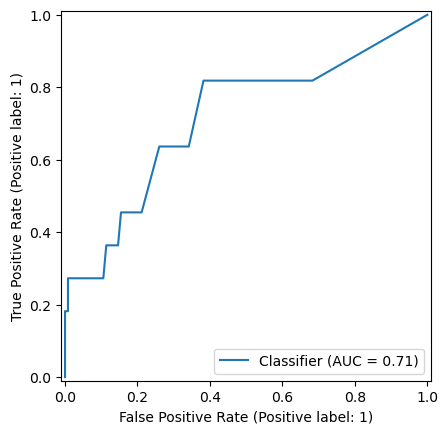

In [321]:
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

random_forest = ('Random Forest', RandomForestClassifier(random_state=42, class_weight='balanced'))

#Dividir os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Treinar e avaliar
model_metrics = train_and_evaluate_multi_target(random_forest, X_train, y_train, X_test, y_test)

# Mostrar o DataFrame com formatação tabular
model_metrics.head()


100%|██████████| 4/4 [03:15<00:00, 48.94s/it]


,Target,Best params,Train Accuracy,Test Accuracy,CV Acc Mean,CV Acc Std,Precision,Recall,Specificity,F1 Score,Area under ROC curve
Model Name,,,,,,,,,,,
Random Forest,Hinselmann,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.979401,0.925373,0.940077,0.018303,0.000000,0.000000,0.976378,0.000000,0.408324
Random Forest,Schiller,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.971910,0.880597,0.874493,0.025312,0.333333,0.230769,0.950413,0.272727,0.685950
Random Forest,Citology,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.941948,0.895522,0.898882,0.028087,0.200000,0.090909,0.967480,0.125000,0.609756
Random Forest,Biopsy,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.964419,0.888060,0.910133,0.031148,0.300000,0.272727,0.943089,0.285714,0.767923


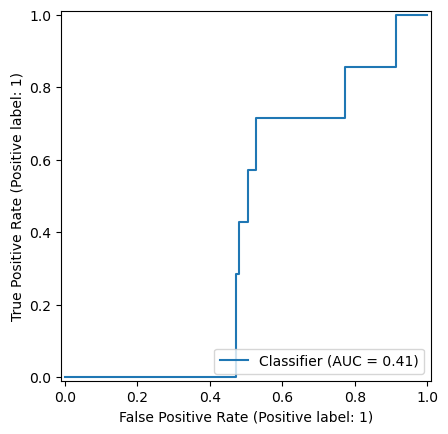

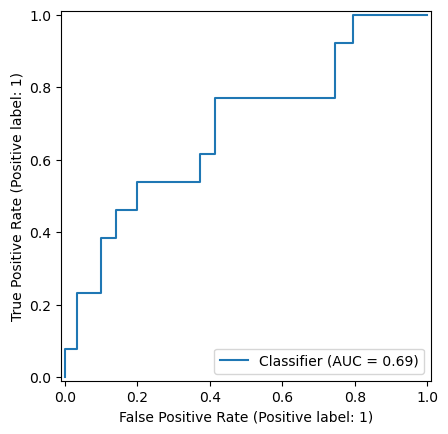

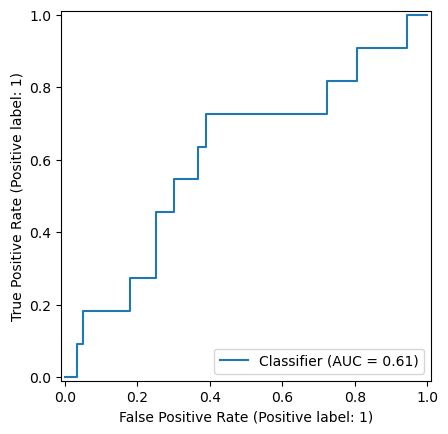

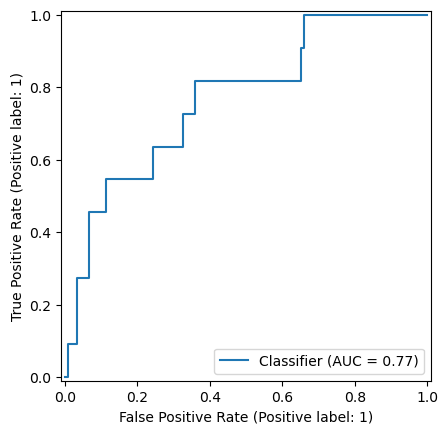

In [332]:
param_grid = {
    'n_estimators': [100, 300],          # Número de árvores
    'max_depth': [None, 10, 20],         # Profundidade máxima
    'min_samples_split': [2, 5, 10],    # Divisão mínima válida
    'min_samples_leaf': [1, 2, 4],      # Tamanho mínimo da folha
}
metrics, best_models_list = Grid_search( random_forest, param_grid, X_train, y_train, X_test, y_test)
metrics.head()


Como a AUC tem valores entre 0,5 e 1 podemos observar que os resultados obtidos não se encontram dentro do desejado. Precisamos de otimizar os hiperparametros de modo a obter um modelo melhor. 

In [315]:
# Definir o grid de parâmetros com valores válidos
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}
metrics = Grid_search( random_forest, param_grid, X_train, y_train, X_test, y_test)
metrics.head()


#aqui é oq ta mt tempo a correr


  0%|          | 0/4 [00:02<?, ?it/s]


KeyboardInterrupt: 

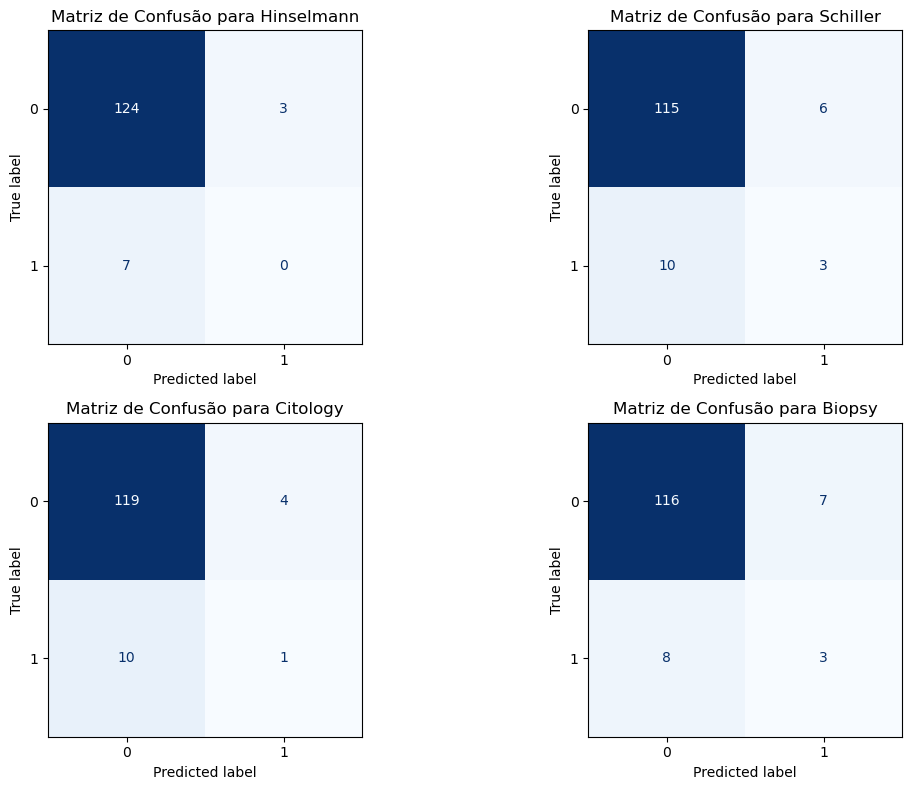

In [334]:
Confusion_matrix(best_models_list, X_test, y_test)

Como o objetivo principal é detetar corretamente verdadeiros positivos, podemos observar que o modelo não o está a fazer corretamente. 

3.2 - Support Vector Machine (SVM)


  0%|          | 0/4 [00:00<?, ?it/s]C:\Users\larad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\larad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 50%|█████     | 2/4 [00:00<00:00, 12.24it/s]C:\Users\larad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

,Target,Train Accuracy,Test Accuracy,CV Acc Mean,CV Acc Std,Precision,Recall,Specificity,F1 Score,Area under ROC curve
Model Name,,,,,,,,,,
SVC,Hinselmann,0.956929,0.947761,0.956988,0.008214,0.0,0.0,1.0,0.0,0.440945
SVC,Schiller,0.906367,0.902985,0.906359,0.000856,0.0,0.0,1.0,0.0,0.521933
SVC,Citology,0.947566,0.917910,0.947589,0.007352,0.0,0.0,1.0,0.0,0.431633
SVC,Biopsy,0.936330,0.917910,0.936408,0.008559,0.0,0.0,1.0,0.0,0.553585


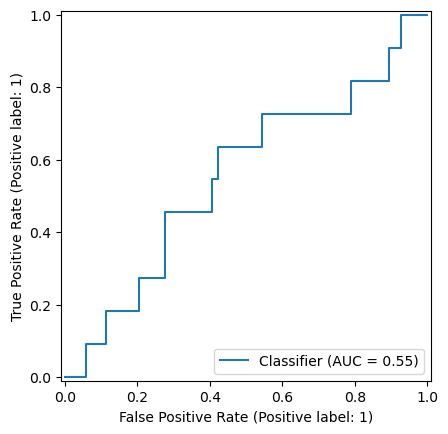

In [302]:
from sklearn.svm import LinearSVC, SVC
from tabulate import tabulate

model = ('SVC', SVC())

# Dividir os dados
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Treinar e avaliar
model_metrics = train_and_evaluate_multi_target(model, X_train, Y_train, X_test, Y_test)

# Mostrar o DataFrame com formatação tabular
model_metrics.head()


3.3

3.4 - Ensemble

3.5 - Diagnóstico Dx

In [ ]:
#Preparar os Dados
Y = df_cervical_cancer['Diagnóstico']  # Target variable
X = df_cervical_cancer.drop(['Diagnóstico'], axis=1)  # Features

from sklearn.linear_model import LinearRegression
model = ('Linear Regression', LinearRegression())

# Dividir os dados
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Treinar e avaliar
model_metrics = train_and_evaluate_multi_target(model, X_train, Y_train, X_test, Y_test)

# Mostrar o DataFrame com formatação tabular
print(tabulate(model_metrics, headers='keys', tablefmt='fancy_grid'))

 <h3>4. Result evaluation</h3>

 <h3>5. Discussion</h3>

 <h3>6. Model test (onde fazemos o questionário para mostrar a aplicação do nosso modelo</h3>